In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
X= df.iloc[:,1:17]
Y = df.iloc[:,17]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
def get_standardized_val(data):
    df_norm = (data-data.min())/(data.max()-data.min())
    return(df_norm)

In [5]:
X=get_standardized_val(X)
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


# Building the model

In [6]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,Y)

KNeighborsClassifier()

In [7]:
df["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [8]:
#Since the class 5 has just 4 data points hence we keep the n_splits as 3

In [9]:
kfold = KFold(n_splits=3)

In [10]:
cvs=cross_val_score(model,X,Y,cv=kfold)

In [11]:
print(cvs.mean())

0.9096850861556743


# Checking model on 2 random datapoints

In [12]:
predict_val = df.iloc[99:101,1:17]
predict_val

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0


In [13]:
model.predict(predict_val)

array([6, 2], dtype=int64)

In [14]:
df.iloc[99:101,17]

99     7
100    2
Name: type, dtype: int64

# Finding optimal number of neighbours

In [15]:
optimal_neighbours = [2*i+1 for i in range(0,10)]
cvsl =[]
for size in optimal_neighbours:
    model=KNeighborsClassifier(n_neighbors=size)
    model.fit(X,Y)
    cvs=cross_val_score(model,X,Y,cv=3)
    print("no of neighbours: "+str(size)+"     Average Score: "+str(cvs.mean()))
    cvsl.append(cvs.mean())

no of neighbours: 1     Average Score: 0.9503862150920974
no of neighbours: 3     Average Score: 0.94058229352347
no of neighbours: 5     Average Score: 0.9402852049910874
no of neighbours: 7     Average Score: 0.9007724301841948
no of neighbours: 9     Average Score: 0.9007724301841948
no of neighbours: 11     Average Score: 0.8906714200831848
no of neighbours: 13     Average Score: 0.8612596553773025
no of neighbours: 15     Average Score: 0.8416518122400475
no of neighbours: 17     Average Score: 0.82174688057041
no of neighbours: 19     Average Score: 0.8116458704693997


(0.6, 1.2)

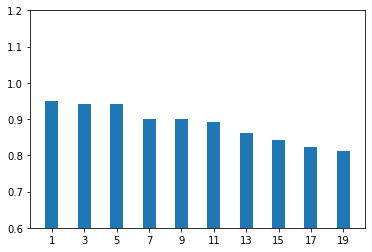

In [17]:
plt.bar(optimal_neighbours,cvsl)
plt.xticks(optimal_neighbours)
plt.ylim(0.6,1.2)

In [84]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=kfold)
cvs.mean()

0.9096850861556743

In [85]:
model.predict(predict_val)

array([7, 2], dtype=int64)

Even though 1 gives higher accuracy , we choose 3 as optimal number beacuse just considering 1 nearest neighbour is inadequate to reach a conclusion

# Hence optimum number of neighbours is 3 with accuracy 0.9096 for KNN